## Import libaries and dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url_data = 'https://raw.githubusercontent.com/GDGoCTelu/Machine-Learning-Repository/refs/heads/main/Source%20Codes/4_Machine%20Learning%20101%20(Unsupervised%20Learning)/marketing_campaign.csv'


df = pd.read_csv(url_data, sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
!pip install feature-engine  # instalasi library feature-engine

Missing value & duplicated data

In [6]:
df.isna().sum().sort_values(ascending=False)

,0
Income,24
ID,0
NumDealsPurchases,0
Z_Revenue,0
Z_CostContact,0
Complain,0
AcceptedCmp2,0
AcceptedCmp1,0
AcceptedCmp5,0
AcceptedCmp4,0


In [7]:
len(df)

2240

In [8]:
df.dropna(inplace=True) # ngehapus baris data yang missing
df.isna().sum().sort_values(ascending=False)

,0
ID,0
NumDealsPurchases,0
Z_Revenue,0
Z_CostContact,0
Complain,0
AcceptedCmp2,0
AcceptedCmp1,0
AcceptedCmp5,0
AcceptedCmp4,0
AcceptedCmp3,0


In [9]:
len(df)

2216

In [10]:
df.duplicated().sum()

0

## Feature Extraction & Engineering

In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [13]:
categorical_cols = [var for var in df.columns if df[var].dtype == 'object'] # buat ngambil kolom kategorikal

categorical_cols

['Education', 'Marital_Status', 'Dt_Customer']

In [14]:
for col in categorical_cols:
  print(df[col].value_counts())
  print('-'*50)

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
--------------------------------------------------
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
--------------------------------------------------
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
09-05-2014     1
26-06-2013     1
09-01-2014     1
Name: count, Length: 662, dtype: int64
--------------------------------------------------


Fix `Marital_Status` & `Education`

In [15]:
df['Education'] = df['Education'].replace({'2n Cycle' : 'Master'})

In [16]:
# marital status

df['Marital_Status'] = df['Marital_Status'].replace({
    'Absurd' : 'Single',
    'Alone' : 'Single',
    'YOLO' : 'Single',
    'Divorced': 'Single',
    'Widow' : 'Single',
    'Married' : 'In a relationship',
    'Together' : 'In a relationship',
})



In [17]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [19]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
In a relationship,1430
Single,786


In [20]:
people_per_household = df['Marital_Status'].replace({
    'Single' : 1,
    'In a relationship' : 2
})

df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + people_per_household

<ipython-input-20-a84074d9a32f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  people_per_household = df['Marital_Status'].replace({


In [21]:
for col in categorical_cols:
  print(df[col].value_counts())
  print('-'*50)

Education
Graduation    1116
Master         565
PhD            481
Basic           54
Name: count, dtype: int64
--------------------------------------------------
Marital_Status
In a relationship    1430
Single                786
Name: count, dtype: int64
--------------------------------------------------
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
09-05-2014     1
26-06-2013     1
09-01-2014     1
Name: count, Length: 662, dtype: int64
--------------------------------------------------


In [24]:
df['EnrollmentDate'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y').apply(lambda x: x.year)

In [27]:
df['EnrollmentDate']

,EnrollmentDate
0,2012
1,2014
2,2013
3,2014
4,2014
...,...
2235,2013
2236,2014
2237,2014
2238,2014


In [28]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Family_Size,EnrollmentDate
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1,2012
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,3,2014
2,4141,1965,Graduation,In a relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,2,2013
3,6182,1984,Graduation,In a relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,3,2014
4,5324,1981,PhD,In a relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,3,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,In a relationship,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,3,2013
2236,4001,1946,PhD,In a relationship,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,5,2014
2237,7270,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,1,2014
2238,8235,1956,Master,In a relationship,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,3,2014


In [29]:
df.drop(['Dt_Customer', 'ID'], axis=1, inplace=True)


In [31]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Family_Size',
       'EnrollmentDate'],
      dtype='object')

In [32]:
purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases']
df['Num_Total_Purchases'] = df[purchases].sum(axis=1)

In [33]:
promotions = ['AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

df['Num_Accepted_Cmp'] = df[promotions].sum(axis=1)

In [34]:
mnt_products = ['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Amount_Spent'] = df[mnt_products].sum(axis=1)

In [35]:
df.sample(2, random_state=42)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Family_Size,EnrollmentDate,Num_Total_Purchases,Num_Accepted_Cmp,Total_Amount_Spent
961,1962,PhD,Single,52597.0,0,1,69,492,0,37,...,0,0,3,11,0,2,2014,20,0,578
229,1986,PhD,In a relationship,34320.0,1,0,66,4,1,9,...,0,0,3,11,0,3,2014,4,0,17


## Feature Encoding

In [36]:
categorical_cols = [var for var in df.columns if df[var].dtype == 'object'] # buat ngambil kolom kategorikal

categorical_cols

['Education', 'Marital_Status']

In [37]:
from feature_engine.encoding import OrdinalEncoder

label_encoder = OrdinalEncoder(
    encoding_method='arbitrary', # label encoding
    variables=categorical_cols
)

label_encoder.fit(df)

df = label_encoder.transform(df)

In [38]:
numeric_cols = [var for var in df.columns if df[var].dtype != 'object'] # buat ngambil kolom numerik

numeric_cols

['Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Family_Size',
 'EnrollmentDate',
 'Num_Total_Purchases',
 'Num_Accepted_Cmp',
 'Total_Amount_Spent']

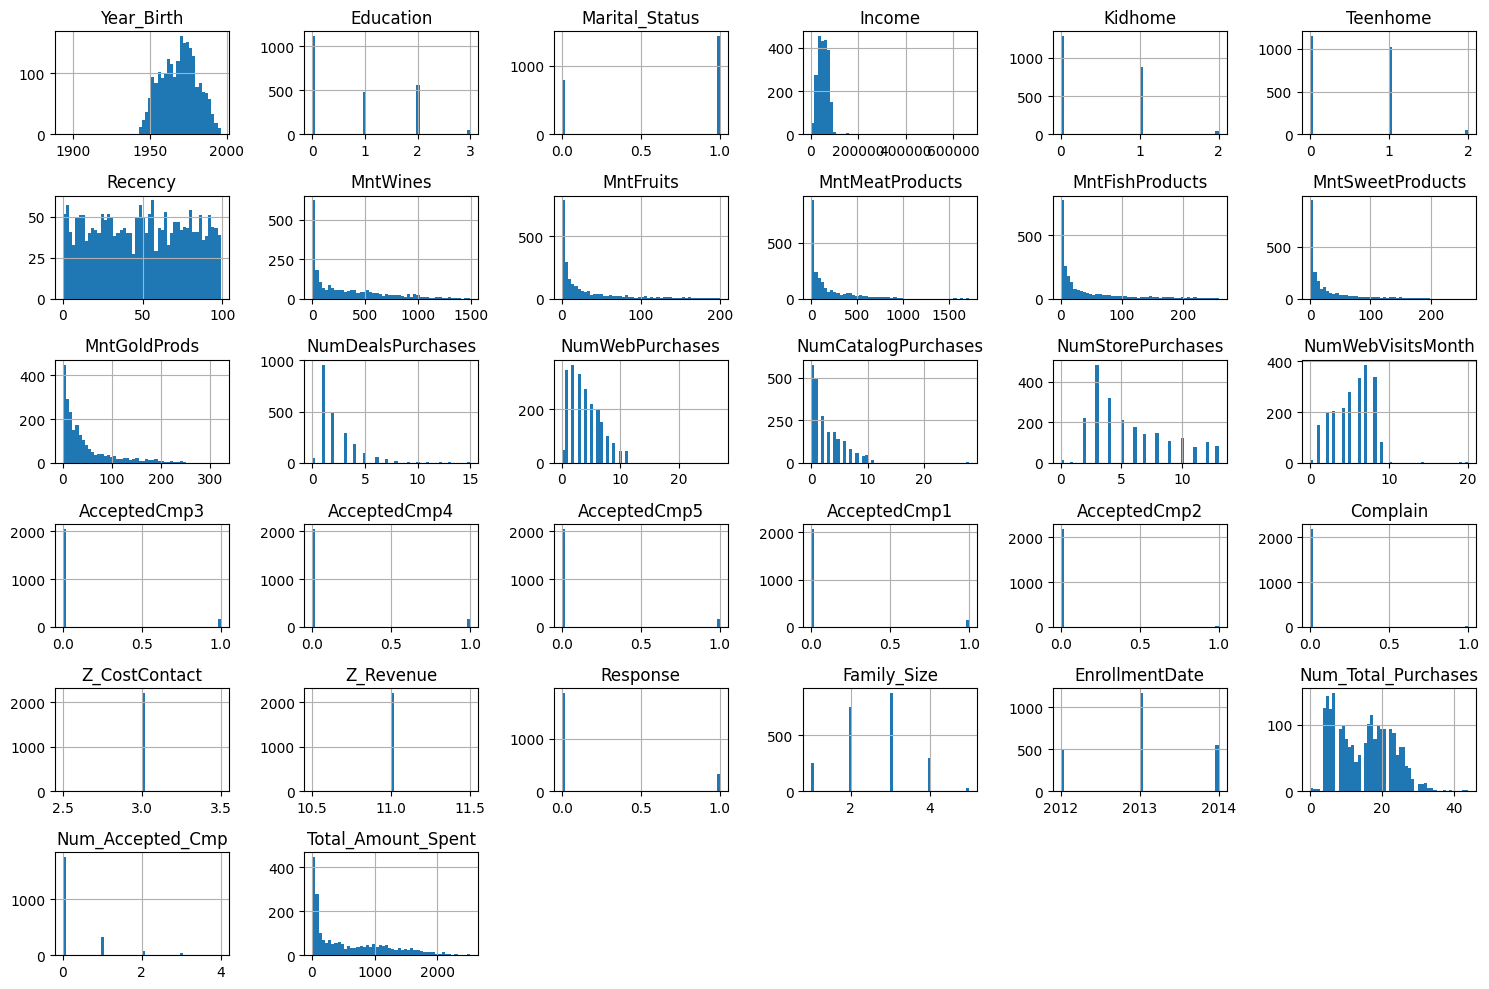

In [41]:
df[numeric_cols].hist(figsize=(15,10), bins=50)
plt.tight_layout()
plt.show()

<Axes: ylabel='Income'>

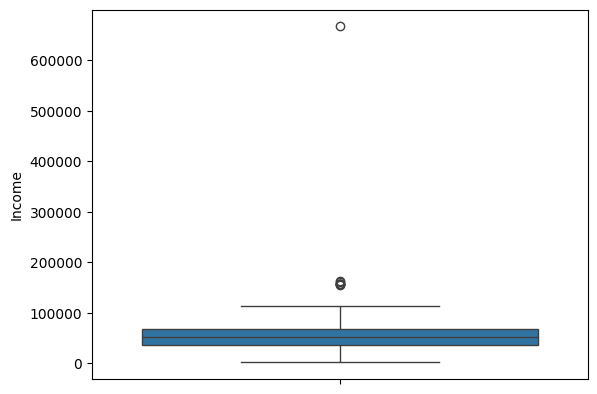

In [42]:
sns.boxplot(df['Income'])

<Axes: ylabel='Income'>

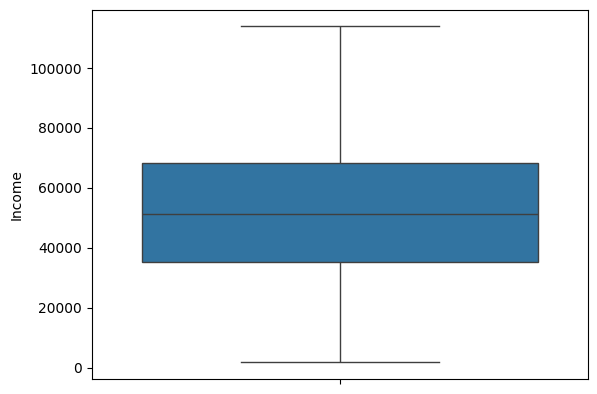

In [43]:
from feature_engine.outliers import OutlierTrimmer

remove_outlier = OutlierTrimmer(
    capping_method='iqr',
    tail='right',
    variables=['Income']
)

df = remove_outlier.fit_transform(df)

sns.boxplot(df['Income'])

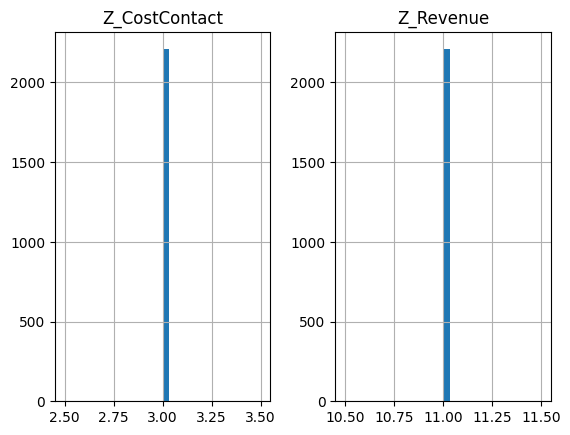

In [45]:
df[['Z_CostContact', 'Z_Revenue']].hist(bins=30)
plt.show()

In [46]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)


Feature Scaling

In [48]:
numeric_cols = [var for var in df.columns if df[var].dtype != 'object'] # buat ngambil kolom numerik

numeric_cols

['Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Family_Size',
 'EnrollmentDate',
 'Num_Total_Purchases',
 'Num_Accepted_Cmp',
 'Total_Amount_Spent']

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[numeric_cols])
df[numeric_cols] = scaler.transform(df[numeric_cols])


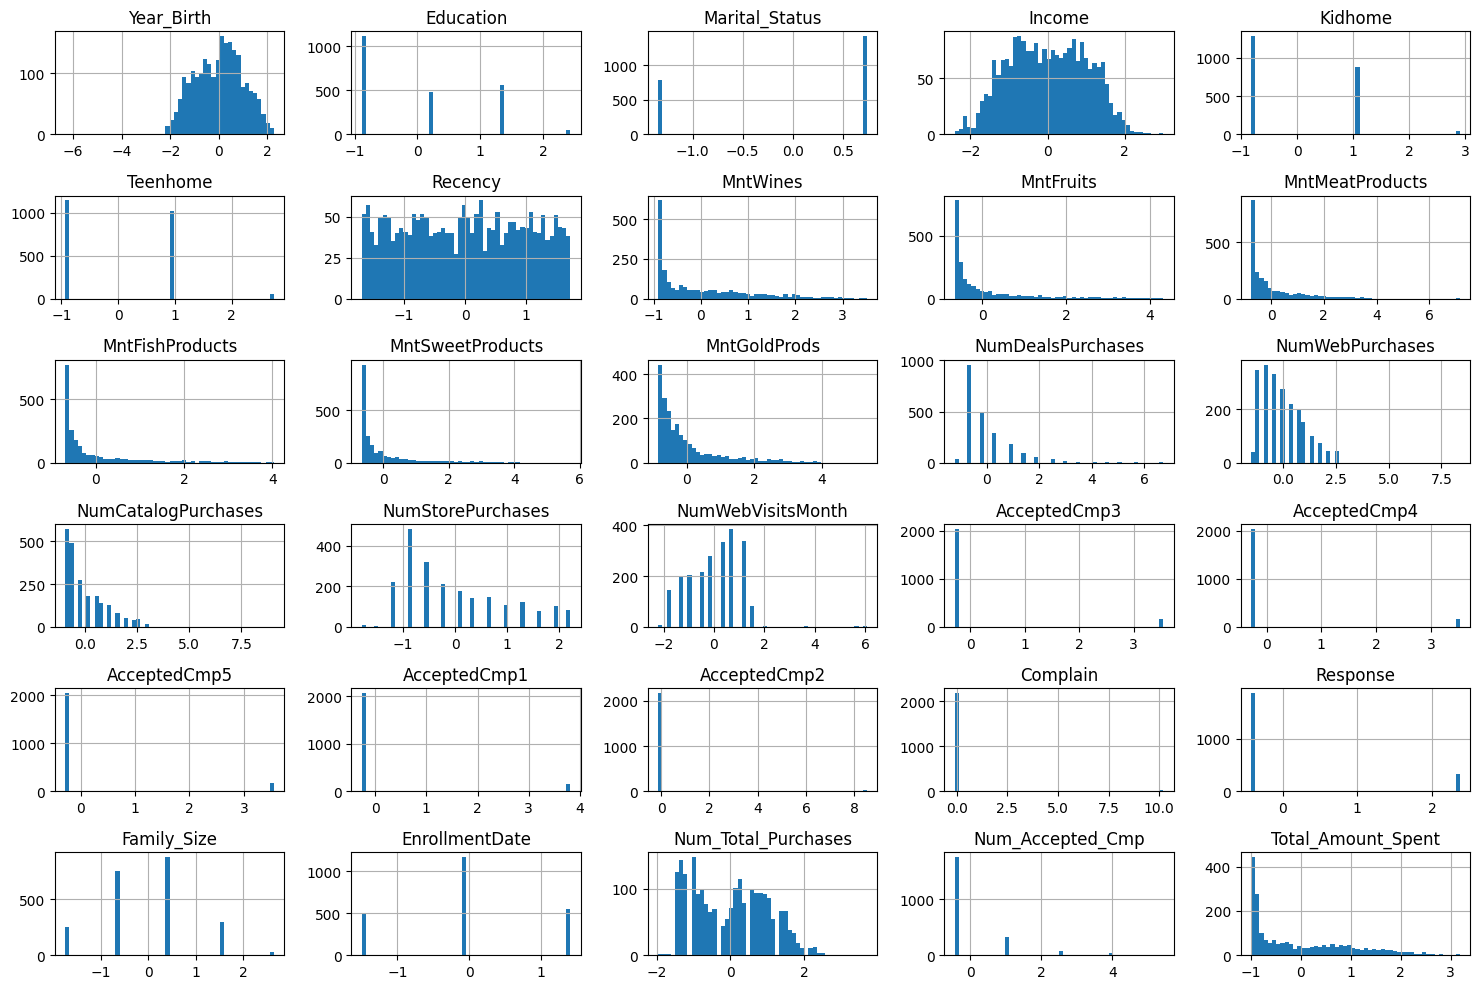

In [50]:
df[numeric_cols].hist(figsize=(15,10), bins=50)
plt.tight_layout()
plt.show()

Dimensionality Reduction --> PCA method

In [51]:
# reduce 3 dimensi

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df)
df_pca = pd.DataFrame(pca.transform(df), columns=['PC1', 'PC2', 'PC3'])

df_pca.head()

,PC1,PC2,PC3
0,4.547521,0.587459,-1.190232
1,-2.870894,-0.324406,-0.317362
2,1.809693,0.900483,-1.174594
3,-3.016450,-1.027137,-0.640685
4,-0.540629,0.710009,-0.390797


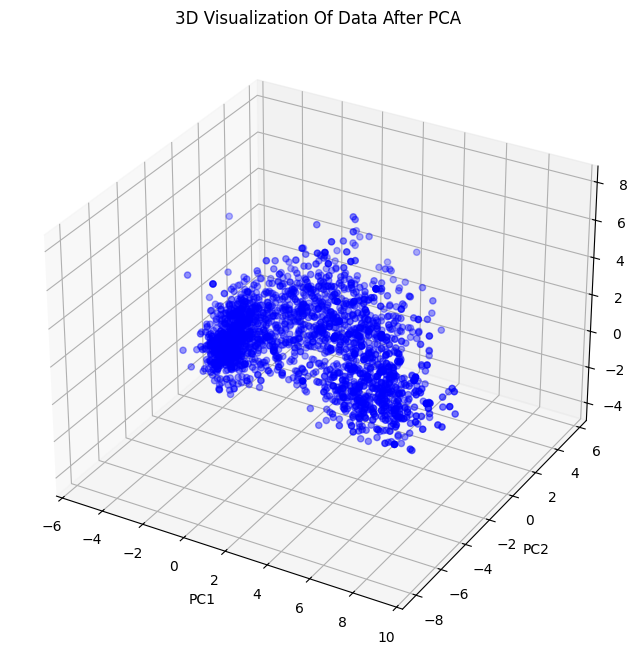

In [52]:
x, y, z = df_pca['PC1'], df_pca['PC2'], df_pca['PC3']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("3D Visualization Of Data After PCA")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()

K-Means Clustering

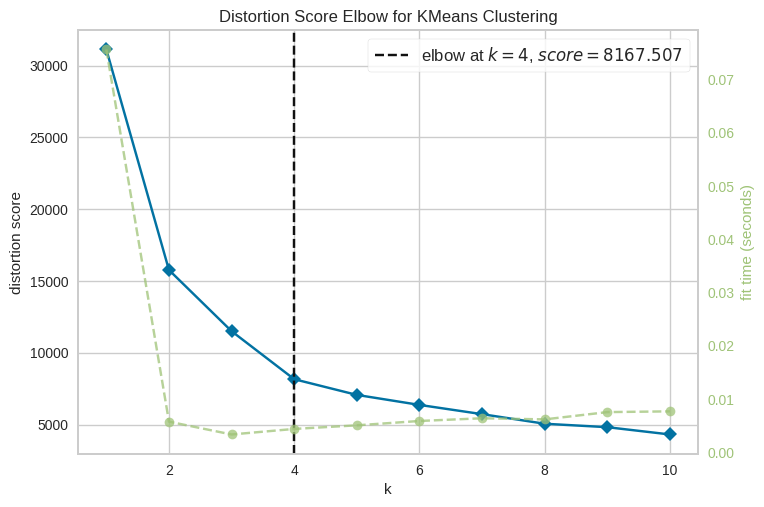

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,11))
visualizer.fit(df_pca)
visualizer.show()

In [57]:
kmeans = KMeans(n_clusters=4) # definisi model KMeans

y_kmeans = kmeans.fit_predict(df_pca) # clustering di data PCA

In [58]:
y_kmeans # hasil cluster

array([1, 2, 1, ..., 1, 0, 2], dtype=int32)

In [59]:
df['Cluster Kmeans'] = y_kmeans # meletakkan hasil prediksi cluster di kolom baru data original

In [60]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Family_Size,EnrollmentDate,Num_Total_Purchases,Num_Accepted_Cmp,Total_Amount_Spent,Cluster Kmeans
0,-0.984809,-0.885132,-1.346380,0.314089,-0.823235,-0.930428,0.310588,0.974689,1.545554,1.747688,...,-0.262168,-0.117363,-0.097991,2.372895,-1.758805,-1.499248,1.329209,-0.440214,1.678075,1
1,-1.235034,-0.885132,-1.346380,-0.255431,1.039166,0.907126,-0.380686,-0.874529,-0.638540,-0.731613,...,-0.262168,-0.117363,-0.097991,-0.421426,0.449578,1.417351,-1.166113,-0.440214,-0.963323,2
2,-0.317541,-0.885132,0.742732,0.964782,-0.823235,-0.930428,-0.795450,0.355320,0.566478,-0.176066,...,-0.262168,-0.117363,-0.097991,-0.421426,-0.654613,-0.040949,0.803878,-0.440214,0.280959,1
3,1.267219,-0.885132,0.742732,-1.206626,1.039166,-0.930428,-0.795450,-0.874529,-0.563226,-0.667335,...,-0.262168,-0.117363,-0.097991,-0.421426,0.449578,1.417351,-0.903448,-0.440214,-0.920130,2
4,1.016993,0.220907,0.742732,0.321573,1.039166,-0.930428,1.554881,-0.394444,0.415851,-0.217388,...,-0.262168,-0.117363,-0.097991,-0.421426,0.449578,1.417351,0.541212,-0.440214,-0.307126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.150724,-0.885132,0.742732,0.463060,-0.823235,0.907126,-0.104176,1.193988,0.415851,0.076455,...,-0.262168,-0.117363,-0.097991,-0.421426,0.449578,-0.040949,0.409879,-0.440214,1.219569,0
2236,-1.902301,0.220907,0.742732,0.597834,2.901566,0.907126,0.241461,0.296050,-0.663644,-0.621422,...,3.814354,-0.117363,-0.097991,-0.421426,2.657960,1.417351,0.935210,1.030274,-0.270579,0
2237,1.016993,-0.885132,-1.346380,0.258218,-0.823235,-0.930428,1.451190,1.783722,0.541373,0.237151,...,-0.262168,-0.117363,-0.097991,-0.421426,-1.758805,1.417351,0.541212,1.030274,1.053443,1
2238,-1.068217,1.326947,0.742732,0.850434,-0.823235,0.907126,-1.417597,0.361247,0.089492,0.223377,...,-0.262168,-0.117363,-0.097991,-0.421426,0.449578,1.417351,1.066543,-0.440214,0.392263,0


In [74]:
palette_kmeans = ['#679436', '#eb5e28', '#4361ee', '#fb8500']

<ipython-input-68-4cf82d010d95>:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<Axes: xlabel='Cluster Kmeans', ylabel='Count'>

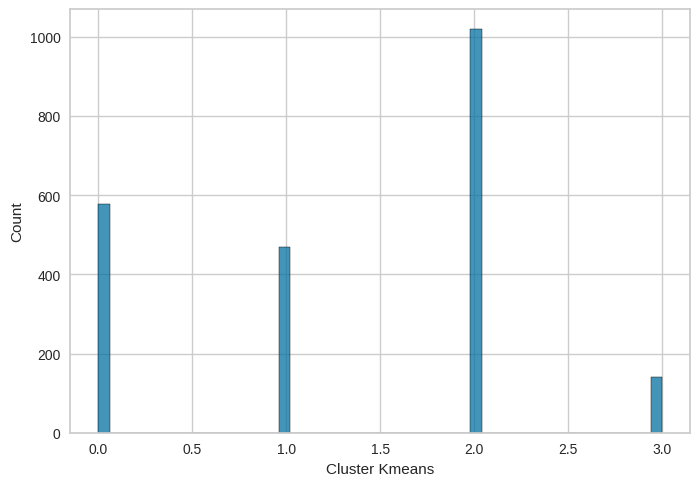

In [68]:
sns.histplot(data=df, x='Cluster Kmeans', palette=palette_kmeans, bins=50)

<ipython-input-75-574a0d78af5d>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Cluster Kmeans', ylabel='Income'>

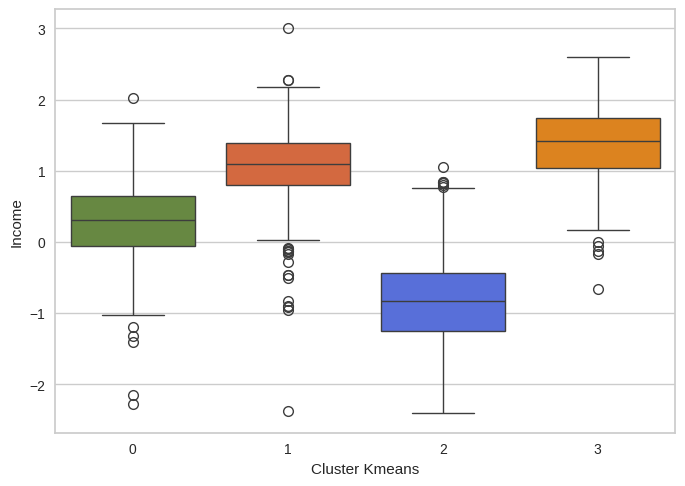

In [75]:
sns.boxplot(data=df, x='Cluster Kmeans', y='Income', palette=palette_kmeans)

<Axes: xlabel='Total_Amount_Spent', ylabel='Income'>

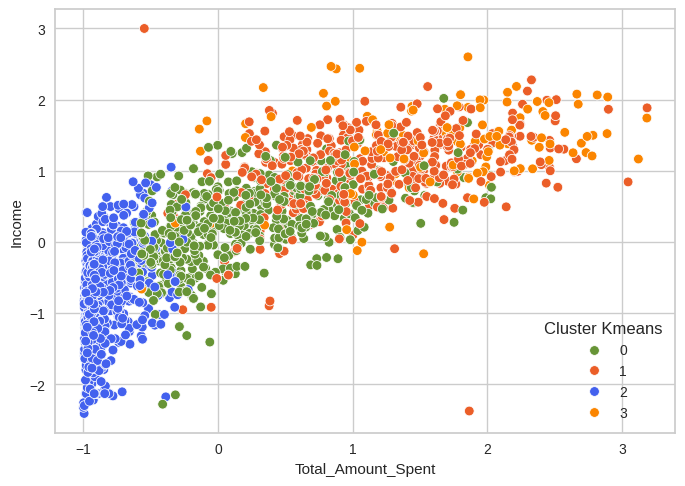

In [76]:
sns.scatterplot(x='Total_Amount_Spent', y='Income', data=df, hue='Cluster Kmeans', palette=palette_kmeans)

## 🎯 Insight dan Konklusi

Berdasarkan grafik boxplot yang menunjukkan distribusi pendapatan (*income*) terhadap empat kluster K-means, berikut adalah analisis mendalam:

## 📊 Analisis per Kluster

### 1. **Kluster 0 (Hijau)**
   - **Median**: Sekitar 0, dengan rentang interkuartil (IQR) yang sempit.
   - **Variabilitas**: Pendapatan rendah hingga menengah, dengan konsistensi tinggi.
   - **Outlier**: Beberapa outlier di atas (sekitar nilai 2), menunjukkan individu dengan pendapatan jauh lebih tinggi.
   - **Kesimpulan**: Kelompok dengan pendapatan rendah/menengah, namun ada segmen kecil dengan pendapatan tinggi.

### 2. **Kluster 1 (Merah)**
   - **Median**: Sekitar 1, dengan IQR sedikit lebih lebar dari kluster 0.
   - **Variabilitas**: Pendapatan menengah ke atas, dengan distribusi yang merata.
   - **Outlier**: Tidak ada outlier signifikan.
   - **Kesimpulan**: Kelompok dengan pendapatan menengah ke atas, stabil dan konsisten.

### 3. **Kluster 2 (Biru)**
   - **Median**: Di bawah 0 (sekitar -0.5), dengan IQR sempit di wilayah negatif.
   - **Variabilitas**: Pendapatan rendah atau di bawah rata-rata, dengan konsistensi tinggi.
   - **Outlier**: Tidak ada outlier signifikan.
   - **Kesimpulan**: Kelompok dengan pendapatan rendah, mungkin menunjukkan kondisi ekonomi yang seragam.

### 4. **Kluster 3 (Oranye)**
   - **Median**: Sekitar 1.5, dengan IQR lebar menunjukkan variabilitas tinggi.
   - **Variabilitas**: Pendapatan tinggi, dengan distribusi yang beragam.
   - **Outlier**: Beberapa outlier di atas (sekitar nilai 3), menunjukkan individu dengan pendapatan sangat tinggi.
   - **Kesimpulan**: Kelompok elit atau kaya, dengan pendapatan tertinggi dan ketidakseimbangan signifikan.

## 🌟 Insight Umum
- Grafik menunjukkan segmentasi pendapatan yang jelas melalui K-means, dengan kluster 0 dan 2 mewakili pendapatan rendah/menengah, sedangkan kluster 1 dan 3 mewakili pendapatan menengah ke atas, terutama kluster 3 yang dominan untuk pendapatan tinggi.
- Adanya **outlier** di kluster 0 dan 3 mengindikasikan ketidakseimbangan pendapatan, yang dapat menjadi fokus analisis lebih lanjut (misalnya, faktor sosial, ekonomi, atau demografis).
- Distribusi pendapatan yang tidak merata antar kluster dapat dimanfaatkan untuk:
  - **Strategi Bisnis**: Menargetkan segmen pasar tertentu berdasarkan pendapatan.
  - **Kebijakan Publik**: Mengatasi kesenjangan pendapatan atau mendukung kelompok ekonomi tertentu.
  - **Analisis Pasar**: Memahami pola konsumsi berdasarkan kelompok pendapatan.